# Portfolio Optimization
Using Several Parameters such as:  
Sharpe ratio  
Daily returns  
Cumulative returns  
Volatility returns 

In [22]:
import numpy as np 
import os
import pandas as pd
import matplotlib.pyplot as plt 
import stockFunctions as sf 
import datetime as dt 

In [23]:
def optimize_portfolio(sd, ed, syms, gen_plot=False):
    import random
    import stockFunctions as sf
    import pandas as pd
    import numpy as np 
    # Read in adjusted closing prices for given symbols, date range
    
    dates = pd.date_range(sd, ed)
    prices_all = sf.get_data(syms, dates)  # automatically adds SPY
    syms.remove('SPY')
    prices_all = sf.normalize_data(prices_all)
    prices = prices_all[syms]  # only portfolio symbols
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later
    
    # find the allocations for the optimal portfolio
    # note that the values here ARE NOT meant to be correct for a test case
    Allocated = tuple(np.random.random(len(syms)))
    Allocated /= np.sum(Allocated)
    print(Allocated)
    def min_func_sharpe(Allocated):
        return -sf.Compute_stats(prices, Allocated)[3]
    
    allocs =  sf.Optimize_alloc(min_func_sharpe , Allocated)# add code here to find the allocations
    cr, adr, sddr, sr = sf.Compute_stats(prices, allocs) # add code here to compute stats

    # Get daily portfolio value
    port_val = sf.Compute_daily_port_val(prices,  list(allocs)) # add code here to compute daily portfolio values

    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:
        # add code to plot here
        df_temp = pd.concat([port_val, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)
        sf.plot_data(df_temp)

    return print("New Allocation Percentage: {}\n Cumulative Return: {}\n Avg. Daily Return: {}\n Volatility/Std of Portfolio Return: {}\n Sharpe Ration: {}".format(allocs, cr, adr, sddr, sr))

[ 0.39887626  0.54623055  0.05489319]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.5025998013839041
            Iterations: 2
            Function evaluations: 10
            Gradient evaluations: 2


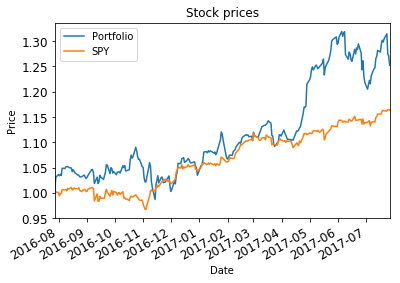

New Allocation Percentage: [  1.00000000e+00   0.00000000e+00   9.02056208e-17]
 Cumulative Return: -1.4715739639804224
 Avg. Daily Return: 0.0009465268698970004
 Volatility/Std of Portfolio Return: 0.00999976722217612
 Sharpe Ration: 1.5025998013839041


In [24]:
optimize_portfolio(sd = '2016-7-28', ed= '2017-7-27',syms = ['GOOG', 'IBM', 'HCP'], gen_plot=True)